In [104]:
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (15,7)
df = pd.read_csv("CREXpita_small.csv", delimiter=',', dtype={'time':'str','unix_time':np.float64,'ihwp':np.int32, 'RTPPITA1CNT':np.float64, 'RTPPITA1CNTSET':np.float64, 'RTPPITA2CNT':np.float64, 'RTPPITA2CNTSET':np.float64}, parse_dates=['time'])
df['ihwp_out'] = 1-df['ihwp'] 
df['pita'] = (df['RTPPITA1CNT']-df['RTPPITA1CNTSET']+ df['RTPPITA2CNT']-df['RTPPITA2CNTSET'])/(2.0)
#df['shift1'] = df['RTPPITA1CNTSET'].shift(1)
#df['shift2'] = df['RTPPITA2CNTSET'].shift(-1)
#df['shifthwp'] = df['ihwp'].shift(1)
#df['shifthwpn'] = df['ihwp'].shift(-1)
#df['same']= df.RTPPITA1CNTSET.eq(df.shift1).mul(df.RTPPITA2CNTSET.eq(df.shift2))
df['rms']=df.RTPPITA1CNTSET.rolling(25,center=True).std()#cut on this to remove points near a change in setting
df['hwp_flip']=df.ihwp.rolling(25,center=True).std()#cut on this to remove points near a change in ihwp
print(df)

                      time     unix_time  ihwp  RTPPITA1CNT  RTPPITA1CNTSET  \
0      2019-12-12 18:08:42  1.576192e+09     0     -679.766          -575.0   
1      2019-12-12 18:08:48  1.576192e+09     0     -683.938          -575.0   
2      2019-12-12 18:08:55  1.576192e+09     0     -683.540          -575.0   
3      2019-12-12 18:09:02  1.576192e+09     0     -671.205          -575.0   
4      2019-12-12 18:09:17  1.576192e+09     0     -685.543          -575.0   
5      2019-12-12 18:09:23  1.576192e+09     0     -685.319          -575.0   
6      2019-12-12 18:09:29  1.576192e+09     0     -685.319          -575.0   
7      2019-12-12 18:09:35  1.576192e+09     0     -684.432          -575.0   
8      2019-12-12 18:09:41  1.576192e+09     0     -664.883          -575.0   
9      2019-12-12 18:09:47  1.576192e+09     0     -661.911          -575.0   
10     2019-12-12 18:09:53  1.576192e+09     0     -682.983          -575.0   
11     2019-12-12 18:09:59  1.576192e+09     0     -

In [105]:
df_new = df[(df['pita'] != 0) & (df['pita']<500) & (df['pita']> -500) & (df['hwp_flip']<0.1) & (df['rms']<10) & (df['RTPPITA1CNTSET']==df['RTPPITA2CNTSET'])]
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
nIn = df_in.shape[0]
pita_in = df_in['pita'].sum()
nOut = df_out.shape[0]
pita_out = df_out['pita'].sum()
print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)

print("Average in retardance", pita_in/nIn*3.1415927/2/12670.)
print("Average out retardance", pita_out/nOut*3.1415927/2/12670.)

Average in voltage -42.40784404467815
Average out voltage -50.50136131683284
Average in retardance -0.005257623254676375
Average out retardance -0.006261038202566079


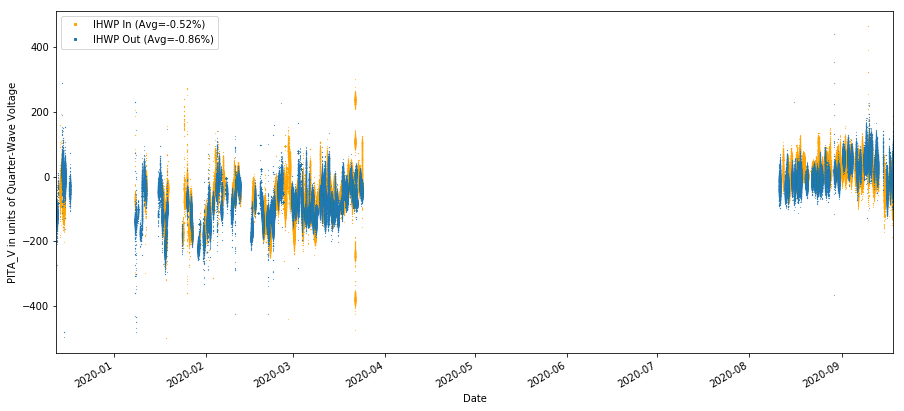

In [106]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()

df_in.plot(x='time',y='pita',style=',', color='orange', ax=ax, label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
df_out.plot(style=',',x='time',y='pita', ax=ax, label='IHWP Out (Avg=-0.86%)',marker='s',markersize=12./fig.dpi)
plt.ylabel('PITA_V in units of Quarter-Wave Voltage')
plt.xlabel('Date')
plt.legend(markerscale=12)
#plt.figure(figsize=(10,7))
fig1=plt.gcf()
fig1.savefig('../pitavst.png',bbox_inches='tight')
plt.show()


#print(nIn+nOut)

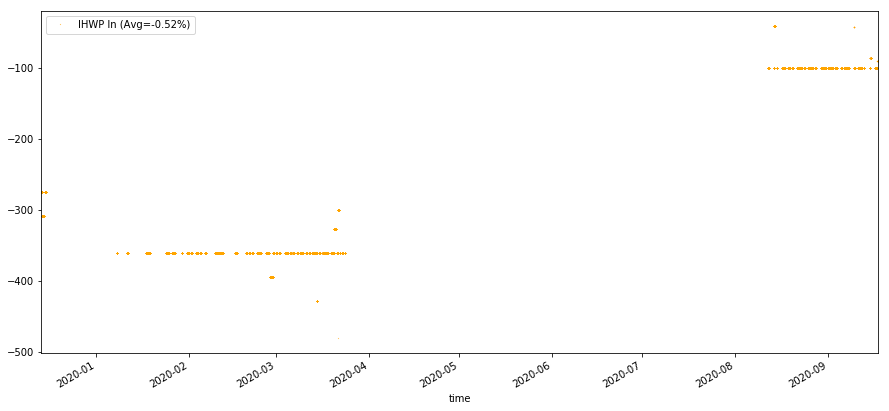

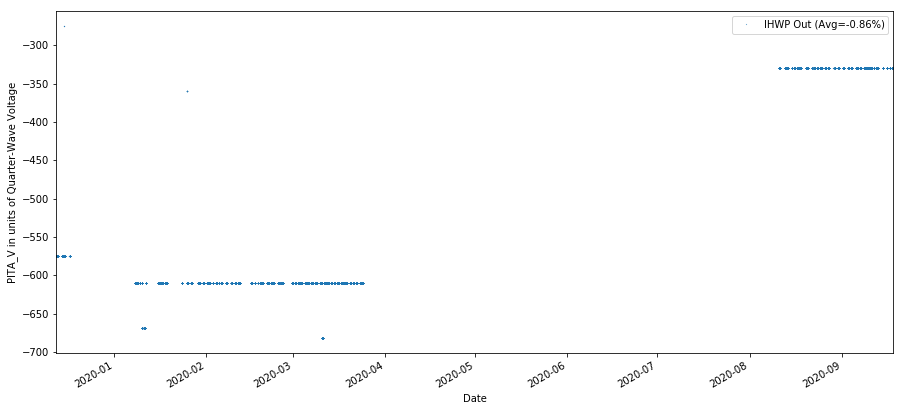

In [107]:
df_in.plot(x='time',y='RTPPITA1CNTSET',style=',', color='orange', label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
df_out.plot(style=',',x='time',y='RTPPITA1CNTSET', label='IHWP Out (Avg=-0.86%)',marker='s',markersize=12./fig.dpi)
plt.ylabel('PITA_V in units of Quarter-Wave Voltage')
plt.xlabel('Date')
plt.show()


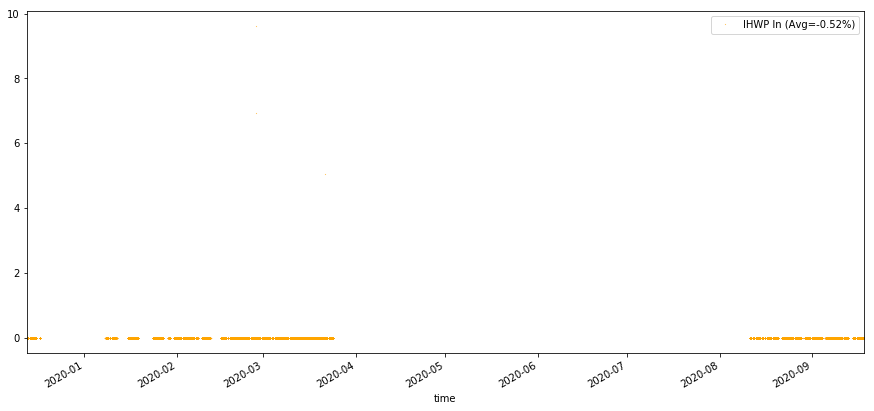

In [108]:
df_new.plot(x='time',y='rms',style=',', color='orange', label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
plt.show()


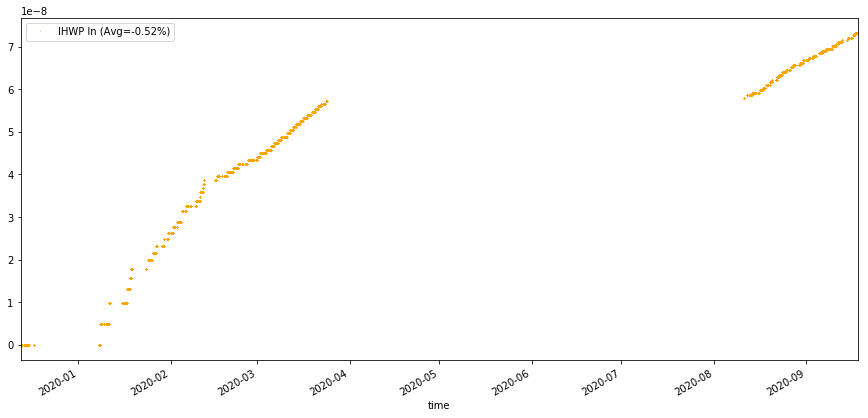

In [109]:
df_new.plot(x='time',y='hwp_flip',style=',', color='orange', label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
plt.show()


In [123]:
df_new = df[(df['pita'] != 0) & (df['pita']<500) & (df['pita']> -500) & (df['hwp_flip']<0.1) & (df['rms']<10) & (df['RTPPITA1CNTSET']==df['RTPPITA2CNTSET']) & (df['unix_time']<1577836800)]
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
df_out['pita1'] = (df_new['RTPPITA1CNT']+575)
nIn = df_in.shape[0]
pita_in = df_in['pita'].sum()
nOut = df_out.shape[0]
pita_out = df_out['pita1'].sum()
print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)
print("Average in retardance", pita_in/nIn*3.1415927/2/12670.)
print("Average out retardance", pita_out/nOut*3.1415927/2/12670.)
nin1 = 0
nout1 = nOut
pita_in1 = 0
pita_out1 = pita_out

df_new = df[(df['pita'] != 0) & (df['pita']<500) & (df['pita']> -500) & (df['hwp_flip']<0.1) & (df['rms']<10) & (df['RTPPITA1CNTSET']==df['RTPPITA2CNTSET']) & (df['unix_time']>1577836800)& (df['unix_time']<1585699200)]
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
df_out['pita1'] = (df_new['RTPPITA1CNT']+610)
nIn = df_in.shape[0]
pita_in = df_in['pita'].sum()
nOut = df_out.shape[0]
pita_out = df_out['pita1'].sum()
print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)
print("Average in retardance", pita_in/nIn*3.1415927/2/12670.)
print("Average out retardance", pita_out/nOut*3.1415927/2/12670.)
nin2 = nIn
nout2 = nOut
pita_in2 = pita_in
pita_out2 = pita_out

df_new = df[(df['pita'] != 0) & (df['pita']<500) & (df['pita']> -500) & (df['hwp_flip']<0.1) & (df['rms']<10) & (df['RTPPITA1CNTSET']==df['RTPPITA2CNTSET']) & (df['unix_time']>1596240000)]
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
df_out['pita1'] = (df_new['RTPPITA1CNT']+330)
nIn = df_in.shape[0]
pita_in = df_in['pita'].sum()
nOut = df_out.shape[0]
pita_out = df_out['pita1'].sum()
print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)
print("Average in retardance", pita_in/nIn*3.1415927/2/12670.)
print("Average out retardance", pita_out/nOut*3.1415927/2/12670.)
nin3 = nIn
nout3 = nOut
pita_in3 = pita_in
pita_out3 = pita_out




Average in voltage -53.178788716031924
Average out voltage -23.14810501909438
Average in retardance -0.00659297925908162
Average out retardance -0.002869846793481463
Average in voltage -78.02740686094965
Average out voltage -88.38650325916421
Average in retardance -0.009673651609877243
Average out retardance -0.01095794764867863
Average in voltage 20.81765389258515
Average out voltage 10.232392088058706
Average in retardance 0.0025809230268378884
Average out retardance 0.0012685875409385553


/home/jonesdc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jonesdc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jonesdc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [124]:
pita_inV = (pita_in1+pita_in2+pita_in3)/(nin1+nin2+nin3)
pita_outV = (pita_out1+pita_out2+pita_out3)/(nout1+nout2+nout3)
print("Average in voltage", pita_inV)
print("Average out voltage", pita_outV)

print("Average in retardance", pita_inV*3.1415927/2/12670.)
print("Average out retardance", pita_outV*3.1415927/2/12670.)


Average in voltage -42.02311470327025
Average out voltage -51.673201911713484
Average in retardance -0.005209925429481313
Average out retardance -0.006406320201715277
